<a href="https://www.kaggle.com/code/rukayatsalau/decision-tree-model-to-predict-the-class-of-wine?scriptVersionId=232536889" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Implementing a Decision Tree Model to prioritise accuracy and maintain simplicity to prevent overfitting in order to predict the class of wine.

The objective of this project is to implement a decision tree model for predicting the class of wine from a wine dataset.

The model is expected to prioritise accuracy while maintaining simplicity to prevent overfitting and ensure interpretability.

**These steps will be followed in order to achieve the goal of this project:**

Step 1: Load and Explore the Data

Step 2: Data Preprocessing

Step 3: Train the Decision Tree Model

Step 4: Fine-Tuning the Model

Step 5: Bias-variance analysis for the tuned model

Step 6: Train the Logistic Regression Model

Step 7: Compare the accuracy of the Decision Tree Model with the Logistic Regression Model

Step 8: Predict the Unseen Data using the tuned Decision Tree Model

# 1. Load the wine dataset
The code below imports the necessary libraries, loads the wine dataset, and displays the first 3 rows of the dataset using Pandas.

The dataset contains 13 features related to the chemical constituents of wines, such as alcohol content, malic acid, ash, magnesium, total phenols, etc. The target variable (target) represents the class of wine (0, 1, or 2), which we need to predict.

In [95]:
# import the pandas library 
import pandas as pd

# Load the wine dataset
wine = pd.read_csv('/kaggle/input/wine-data-and-unseen-data/wine.csv')

# Display the first 3 rows of the dataset
wine.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,0
1,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500.0,2
2,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0,0


# 2. Data Preprocessing
First check for columns with any missing values in the dataset. f missing values are found, they will be handled appropriately.

Split the data into features (x) and the target variable (y).
- Feature Matrix (X): Contains all the input features (independent variables) that will be used to make predictions.
- Target Variable (y): Contains the corresponding labels or outcomes (dependent variable) that the model will try to predict.

Generate train and test sets by splitting data into training and test sets, which enables robust model evaluation, helps detect potential issues such as overfitting, facilitates hyperparameter tuning, and ensures that the model's performance is assessed on independent, unseen data.

In [96]:
# Check for missing values in the wine dataset
missing_values = wine.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [97]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
x = wine.drop(columns=['target'])  # features data - removing target column
y = wine['target']                 # target data - extracting just the target column
  
# Split the data into training and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x,                      # feature matrix     
    y,                      # target vector
    test_size=0.2,          # 20% of data used for testing
    random_state=42         
)

In [98]:
# Display few rows of the training set
x_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
69,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355.0
136,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0
2,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0
93,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235.0
134,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675.0


### Standardise the Features Data

The features are standardised to ensure the models perform well, particularly for logistic regression.

In [99]:
from sklearn.preprocessing import StandardScaler

# Standardize the features by scaling them to have zero mean and unit variance
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Fit to training data and transform it
x_test_scaled = scaler.transform(x_test)      # Transform test data using parameters learned from training data

# 3. Training the Decision Tree Model

A decision tree model is trained on the standardised training data. Then I visualised the decision tree model and plotted its feature importance to understand which features most influence the target prediction.

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [101]:
# Initialize the Decision Tree model with a fixed random state for reproducibility
dt_clif = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier using the scaled training features and target labels
dt_clif.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

### Visualization of the Decision Tree Model

In [102]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

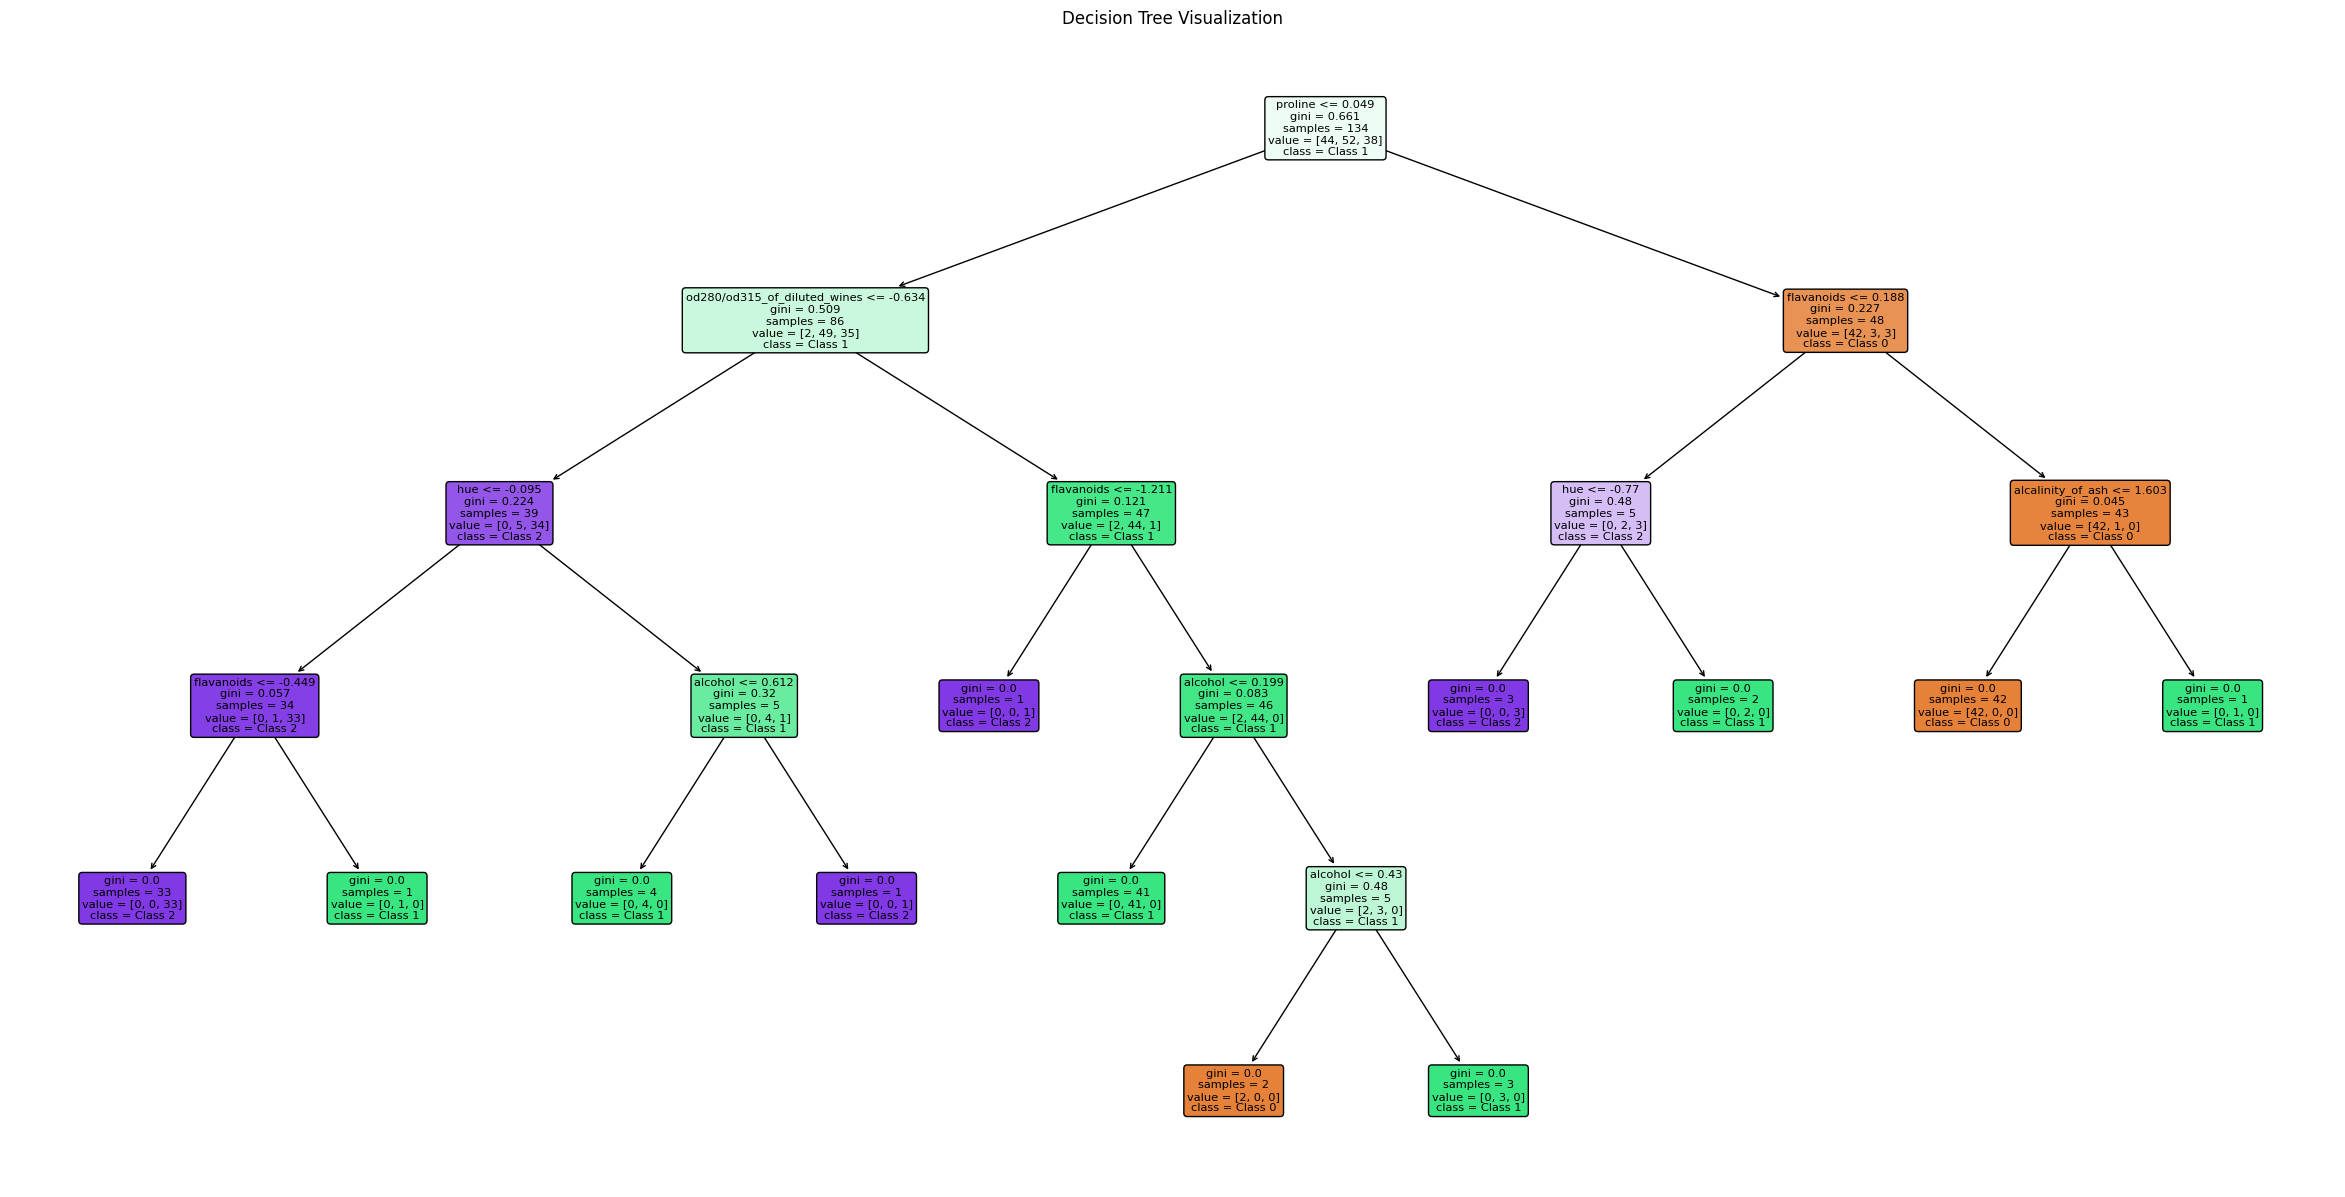

In [103]:
plt.figure(figsize=(30, 15))

# Plot the decision tree using plot_tree function
plot_tree(
    dt_clif,                                    # The trained decision tree model
    feature_names=x.columns,                    # Names of features used in the model
    class_names=['Class 0', 'Class 1', 'Class 2'],  # Names for the target classes
    filled=True,                                
    rounded=True                                
)

# visualization title
plt.title("Decision Tree Visualization")

# Display the plot
plt.show()

### Feature importance of the Decision Tree Model

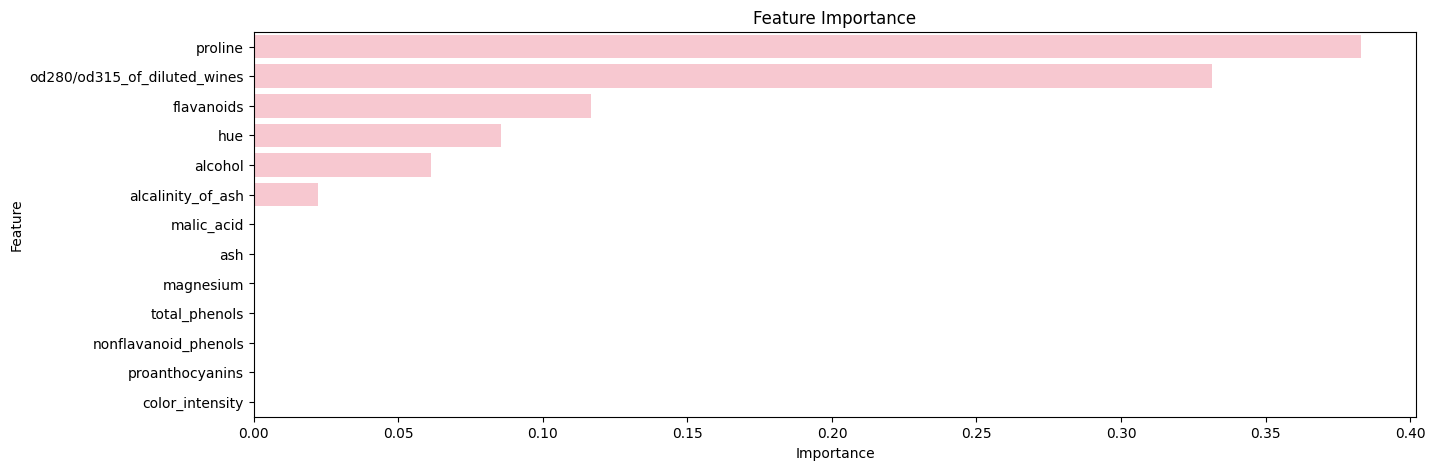

In [104]:
import seaborn as sns
# Show feature importance 
feature_importance = dt_clif.feature_importances_   # Extract feature importance values from the decision tree model
feature_names = x.columns

# Create a DataFrame to display feature importance 
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}) 
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(15, 5)) 
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='pink')

# visualization title
plt.title('Feature Importance') 

# Display the plot
plt.show()

### Evaluate the model to check the accuracy performance on the train and test set before tuning

In [105]:
# Make predictions on the train & test dataset 
pred_train = dt_clif.predict(x_train_scaled) 
pred_test = dt_clif.predict(x_test_scaled) 

# Evaluate the accuracy of the model on the training dataset
train_accuracy = accuracy_score(y_train, pred_train) 
print(f'Accuracy on training dataset: {train_accuracy:.2f}') 

# Evaluate the accuracy of the model on test dataset
test_accuracy = accuracy_score(y_test, pred_test) 
print(f'Accuracy on test dataset: {test_accuracy:.2f}')

Accuracy on training dataset: 1.00
Accuracy on test dataset: 0.94


# 4. Fine-Tuning the Decision Tree Model

GridSearchCV is used to fine-tune the hyperparameters of the decision tree model to prevent overfitting and improve performance. 

After tuning, the model is retrained using the optimal parameters, and the best performance is observed on the training and test datasets.

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
# Define hyperparameters grid
# This dictionary contains the parameters to be tested during grid search
# max_depth: controls the maximum depth of the decision tree
# min_samples_split: minimum number of samples required to split an internal node
# min_samples_leaf: minimum number of samples required to be at a leaf node
param_grid = {
    'max_depth': [1, 2, 3],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}

# Initialize GridSearchCV and Fit GridSearchCV to the training data
# GridSearchCV performs an exhaustive search over the parameter grid
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(x_train, y_train)  # Train models with all parameter combinations

# Extract the parameters that gave the best performance during cross-validation
tuned_params = grid_search.best_params_
print("Tuned Parameters:", tuned_params)

# Train the best model on the entire training data
# best_estimator_ contains the model trained with the best parameters
tuned_model = grid_search.best_estimator_

Tuned Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


# 5. Bias-variance analysis for the tuned Decision Tree Model
Fit the tuned model to the training data and predict with the tuned model on both training and test sets.

1. Train the previously tuned model using the training data.
2. After training, the tuned model is used to make predictions on the training to evaluate how well the model fits the training data and is also used to make predictions on the test data to evaluate how well the model generalizes to unseen data.

In [108]:
# Fit the tuned model to the training data 
tuned_model.fit(x_train, y_train)

# Predict with the tuned model on both training and test sets
y_train_pred_tuned = tuned_model.predict(x_train)
y_test_pred_tuned = tuned_model.predict(x_test)

# Evaluate Accuracy of Decision Tree model
train_accuracy_tuned = accuracy_score(y_train, y_train_pred_tuned)
test_accuracy_tuned = accuracy_score(y_test, y_test_pred_tuned)

print(f'Train Decision Tree Accuracy: {train_accuracy_tuned:.2f}')
print(f'Test Decision Tree Accuracy: {test_accuracy_tuned:.2f}')

Train Decision Tree Accuracy: 0.97
Test Decision Tree Accuracy: 0.94


Calculate Mean Squared Error (MSE) for training and test data

MSE measures the average squared difference between predicted and actual values in order to:
- Assess overall model accuracy
- Compare performance between training and test sets to detect overfitting
- Quantify how well the model generalizes to new, unseen data

In [109]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) for training and test data
train_error = mean_squared_error(y_train, y_train_pred_tuned)
test_error = mean_squared_error(y_test, y_test_pred_tuned)

print(f"Training Error (MSE): {train_error:.2f}")
print(f"Test Error (MSE): {test_error:.2f}")

Training Error (MSE): 0.03
Test Error (MSE): 0.06


In [110]:
# List of different max_depth values to test
max_depth_values = [1, 2, 3, 4]
train_errors = []
test_errors = []

# Loop over max_depth values to fit the model and calculate errors
for depth in max_depth_values:
    # Train Decision Tree with varying max_depth
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(x_train, y_train)
    
    # Predict on training and test data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate Mean Squared Error (MSE) to evaluate model performance
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))


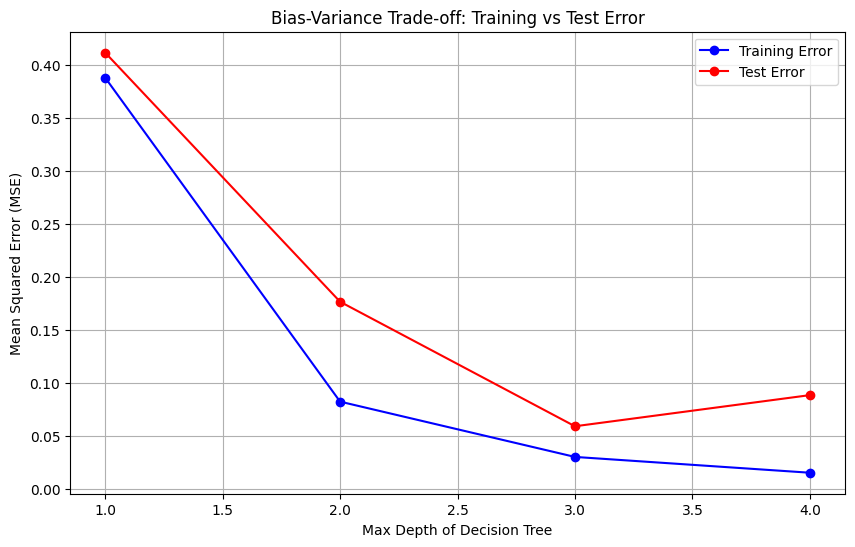

In [111]:
# Plot training and test errors vs max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_errors, label='Training Error', marker='o', color='blue')
plt.plot(max_depth_values, test_errors, label='Test Error', marker='o', color='red')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Bias-Variance Trade-off: Training vs Test Error')
plt.legend()
plt.grid(True)
plt.show()

### Interpretation on the Bias-Variance Analysis
- As the max_depth increases, the training error decreases because the model can fit more complex patterns in the data.

- However, the test error will initially decrease and then start increasing after a certain depth due to overfitting.

- The ideal model strikes a balance where the test error is low and the training error is also reasonably low (but not zero).

From the plot, the bias-variance trade-off analysis shows that **max_depth = 3 yields the best performance** for the decision tree model.

### Visualization of the Tuned Decision Tree Model

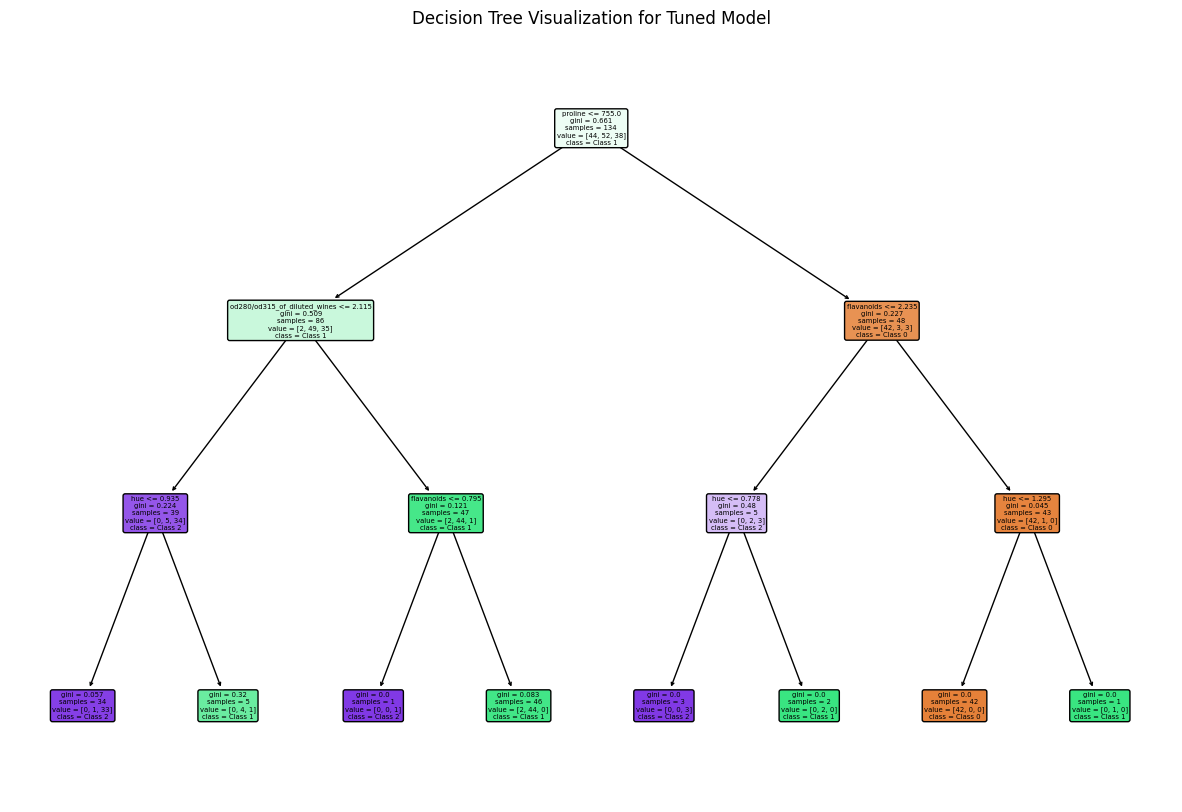

In [112]:
# Visualize the Decision Tree of the tuned model
plt.figure(figsize=(15, 10)) 
plot_tree(tuned_model,
          feature_names=x.columns,
          class_names=['Class 0', 'Class 1', 'Class 2'], 
          filled=True, 
          rounded=True
         )
plt.title("Decision Tree Visualization for Tuned Model")
plt.show()

### Feature importance of the Tuned Decision Tree Model

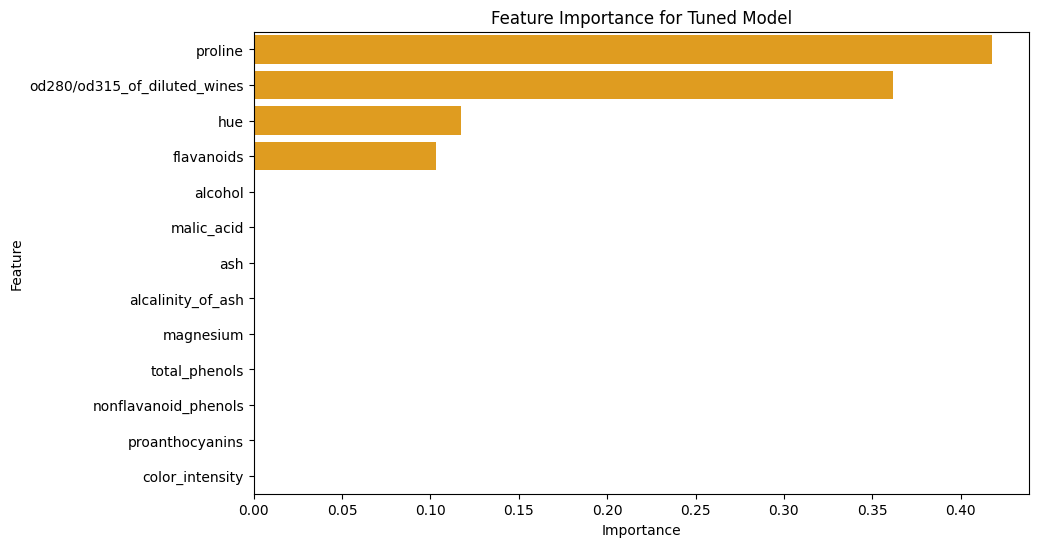

In [113]:
# Show feature importance
feature_importance = tuned_model.feature_importances_ 
feature_names = x.columns 

# Create a DataFrame to display feature importance 
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False) 

# Plot feature importance 
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='orange') 

# Display the plot
plt.title('Feature Importance for Tuned Model') 
plt.show()

# 6. Predict the Unseen Data
Applying the tuned Decision Tree model to predict unseen data.

In [114]:
# Load unseen data 
unseen = pd.read_csv('/kaggle/input/wine-data-and-unseen-data/unseen.csv')

# Display few rows of the unseen data
unseen.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
2,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
3,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
4,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510


In [115]:
# Predict target for unseen data
unseen_predictions = tuned_model.predict(unseen)
print("Predictions for Unseen Data:", unseen_predictions)

Predictions for Unseen Data: [0 0 2 0 1 0 1 2 1 2]


In [116]:
predictions = pd.Series(unseen_predictions, name='target (predicted class)')
results = pd.concat([unseen, predictions], axis=1)
print('Unseen data with predicted class using tuned Decision Tree model:')
print(results)

Unseen data with predicted class using tuned Decision Tree model:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    13.64        3.10  2.56               15.2        116           2.70   
1    14.21        4.04  2.44               18.9        111           2.85   
2    12.93        2.81  2.70               21.0         96           1.54   
3    13.73        1.50  2.70               22.5        101           3.00   
4    12.37        1.17  1.92               19.6         78           2.11   
5    14.30        1.92  2.72               20.0        120           2.80   
6    12.00        3.43  2.00               19.0         87           2.00   
7    13.40        3.91  2.48               23.0        102           1.80   
8    11.61        1.35  2.70               20.0         94           2.74   
9    13.36        2.56  2.35               20.0         89           1.40   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0      

# 7. Training the Logistic Regression Model

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(x_train_scaled, y_train)

# Predict with the Logistic Regression model on the training and test sets
y_trpred_lr_model = lr_model.predict(x_train_scaled)
y_tepred_lr_model = lr_model.predict(x_test_scaled)

### Feature importance of the Logistic Regression Model
A bar chart visualization of feature importance based on the coefficients from the logistic regression model.

Shows which features are most important for classifying each wine class.

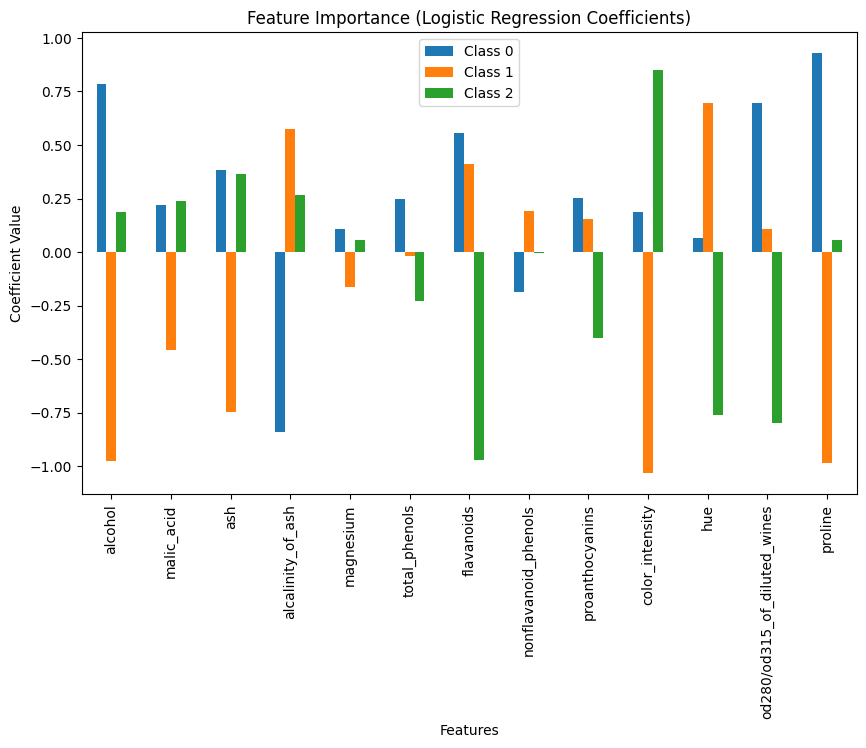

In [119]:
# Plot the feature importance (coefficients)
feature_importance = lr_model.coef_

# Create a DataFrame for better visualization
feature_names = x.columns
importance_df = pd.DataFrame(feature_importance.T, columns=[f'Class {i}' for i in range(3)], index=feature_names)

# Plot the feature importance for each class
importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.show()

# 8. Compare the accuracy of the Decision Tree Model with the Logistic Regression Model

In [120]:
# Evaluate Accuracy of Logistic Regression model
lr_train_accuracy = accuracy_score(y_train, y_trpred_lr_model)
lr_test_accuracy = accuracy_score(y_test, y_tepred_lr_model)

# Compare results
print(f'Train Logistic Regression Accuracy: {lr_train_accuracy:.2f}')
print(f'Test Logistic Regression Accuracy: {lr_test_accuracy:.2f}')

print(f'Train Decision Tree Accuracy: {train_accuracy_tuned:.2f}')
print(f'Test Decision Tree Accuracy: {test_accuracy_tuned:.2f}')

Train Logistic Regression Accuracy: 1.00
Test Logistic Regression Accuracy: 1.00
Train Decision Tree Accuracy: 0.97
Test Decision Tree Accuracy: 0.94


**The Logistic Regression model achieved 100% accuracy on both the training and test data.
This is an unusual result and suggests that the model might have memorized the training set rather than learing from it leading to overfitting.**

**After tuning, the Decision Tree model achieved 97% accuracy on training and 94% on test sets. The accuracy on the test set remains the same as the initial model before tuning. However, the depth of the decision tree model to achieve the predictions reduces to 3 from 5 showing that accuracy of the model is prioritised while maintaining simplicity.**

**The Decision Tree shows a small drop in performance between training and testing, which is a normal outcome. A slight drop (3% in this case) typically means that the model is generalizing well and is less prone to overfitting than the Logistic Regression model. This slight discrepancy shows that the model has learned to make accurate predictions without memorizing specific instances.**